# Titanic Data Exploration and Machine Learning Implementation

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp ## may not use

In [442]:
df = pd.read_csv("C:\\Users\\Thomas\\Workspace 2\\titanic_data.csv")

In [443]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [445]:
## remove data that is incomplete or irrelevant

df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

##df.head()
##df.describe()

In [446]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
(891, 8)


# Data Exploration and Cleaning

Most of the plots are done in both Seaborn and Matplotlib to practice implementing both

In [447]:
def meanMedian(data, columns):
    for col in columns:
        print("Mean %s: " % col, data[col].mean())
        print("Median %s: " % col, data[col].median())
        print('*****************')

col_list = ['Fare', 'Age', 'Parch', 'SibSp' ]
meanMedian(df, col_list)


Mean Fare:  32.2042079685746
Median Fare:  14.4542
*****************
Mean Age:  29.69911764705882
Median Age:  28.0
*****************
Mean Parch:  0.38159371492704824
Median Parch:  0.0
*****************
Mean SibSp:  0.5230078563411896
Median SibSp:  0.0
*****************


In [448]:
## Following Kaggle user Omar El Gabry's lead for data replacement
## original code: https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/run/447794

##df_embark = df.groupby('Embarked').count()
##df_embark.head()

## Output C:168 Q:77 S:644


## Fill the two missing values with S because it is the most common
df['Embarked'] = df['Embarked'].fillna('S')

## Make dummy variables
embarked_dummies = pd.get_dummies(df['Embarked'])
## Drop occurences of S as it will serve as the base case
embarked_dummies.drop(['S'], axis=1, inplace=True)
## Join dummies with DataFrame
df = df.join(embarked_dummies)
## Drop old column
df.drop(['Embarked'], axis=1, inplace=True)



C:\workspace\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


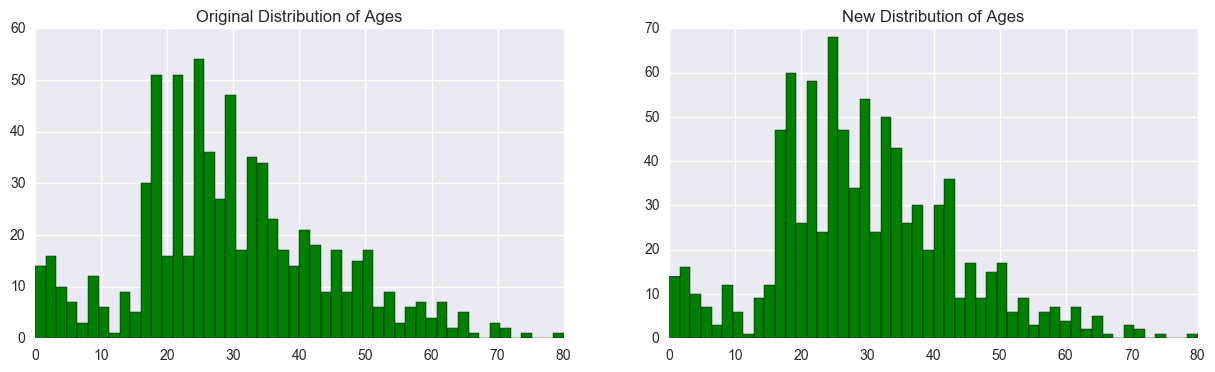

In [449]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Distribution of Ages')
axis2.set_title('New Distribution of Ages')

df.Age.dropna().astype(int).hist(bins=50, ax=axis1,facecolor='green')

## Fill missing Age values with randomly generated integers in range [mean - std, mean + std]

mean_age = df['Age'].mean()
std_age = df['Age'].std()
num_missing = df['Age'].isnull().sum()

random = np.random.randint(mean_age - std_age, mean_age + std_age, size=num_missing)

df['Age'][np.isnan(df['Age'])] = random
df['Age'] = df['Age'].astype(int)
df.Age.hist(bins=50, ax=axis2,facecolor='green')
plt.show()
plt.clf()

In [450]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q'], dtype='object')

C:\workspace\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


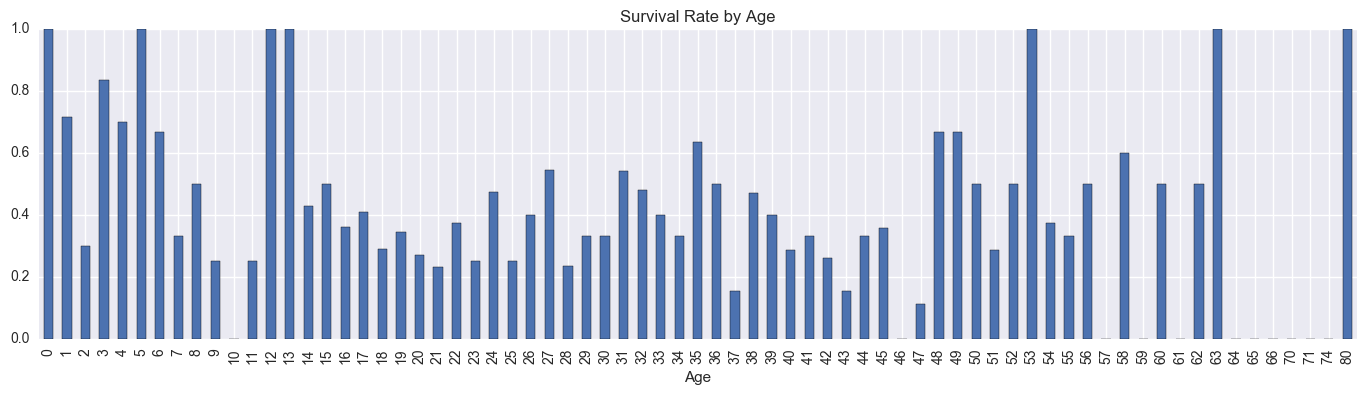

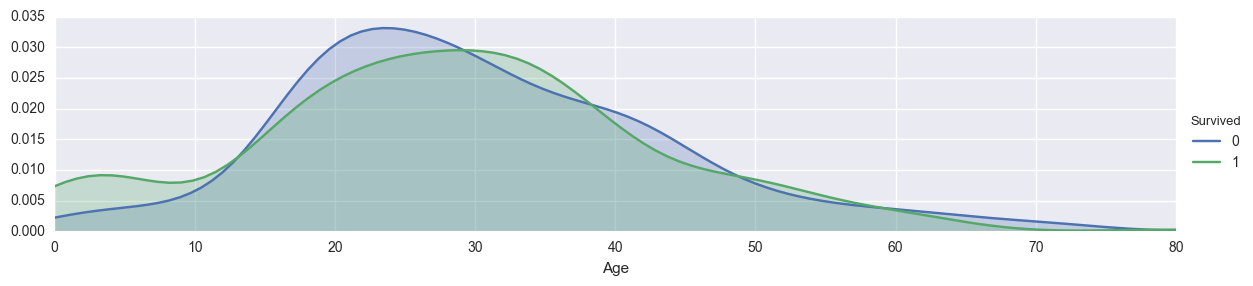

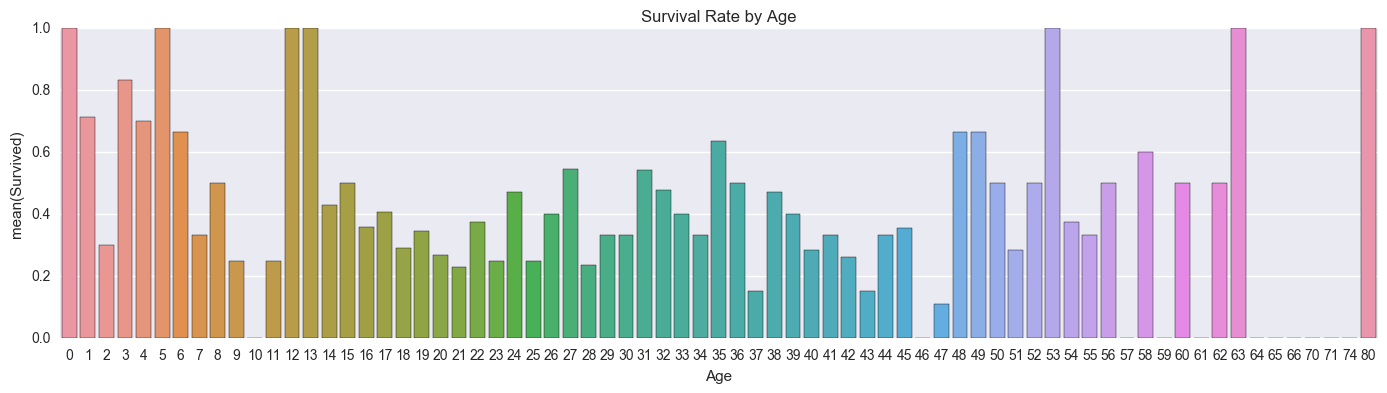

In [451]:
fig, axis2 = plt.subplots(1,1, figsize=(17,4))
bar1 = df.groupby('Age')['Survived'].mean().plot(kind='bar', ax=axis2)
bar1.set_title('Survival Rate by Age')


facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()



fig, axis1 = plt.subplots(1,1, figsize=(17,4))
df_age = df.groupby('Age', as_index=False)['Survived'].mean()
bar = sns.barplot(x='Age', y='Survived', data=df_age, ax=axis1)
bar.set_title('Survival Rate by Age')


plt.show()
plt.clf()

In [452]:
def meanBarPlot(data_df, group, target, tag):
    fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))
    bar = data_df.groupby(group)[target].mean().plot(kind='bar', facecolor='green', ax=axis1)
    bar.set_title('Survival Rate by %s' % tag)

    bar2 = sns.barplot(x=group, y=target, data= data_df, ax=axis2)
    bar2.set_title('Survival Rate by %s' % tag)
    plt.show()
    plt.clf()





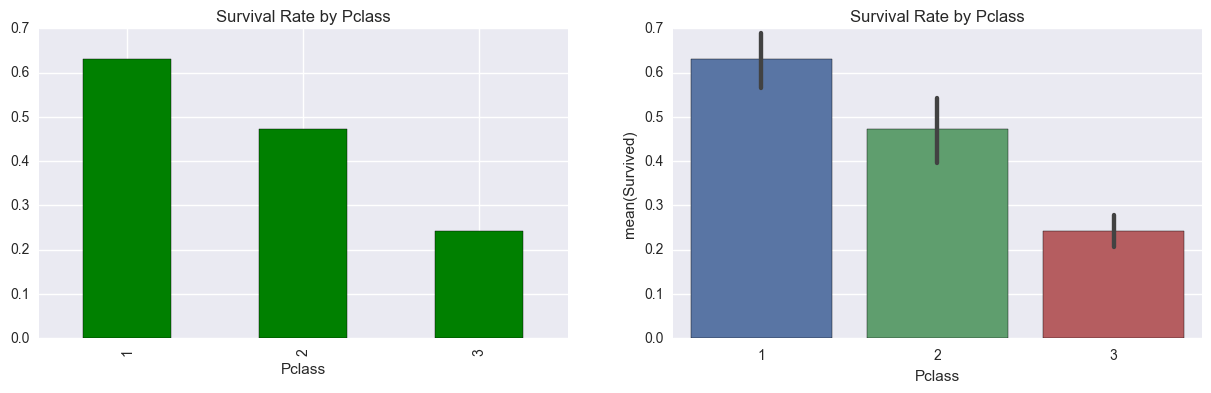

In [453]:
meanBarPlot(df, group='Pclass', target='Survived', tag='Pclass')

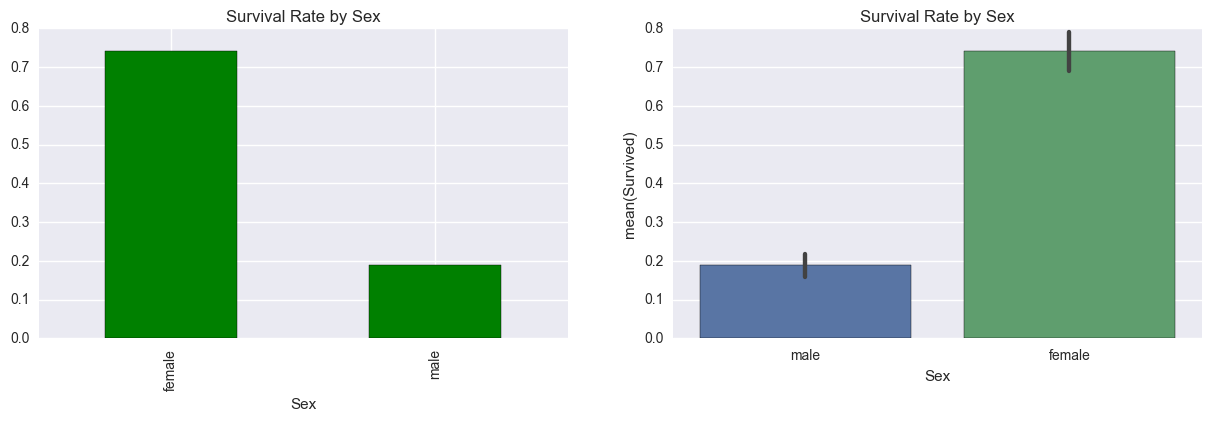

In [454]:
meanBarPlot(df, group='Sex', target='Survived', tag='Sex' )

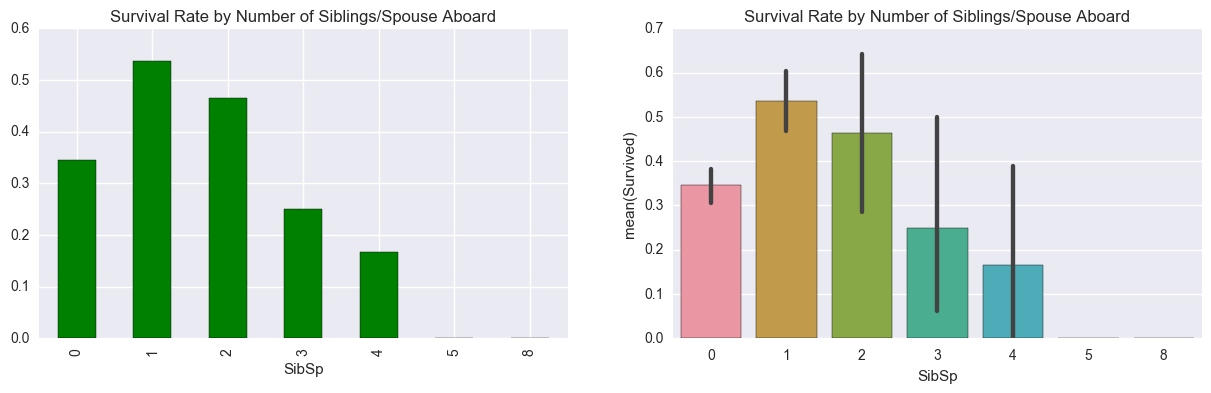

In [455]:
meanBarPlot(df, group='SibSp', target='Survived', tag='Number of Siblings/Spouse Aboard')

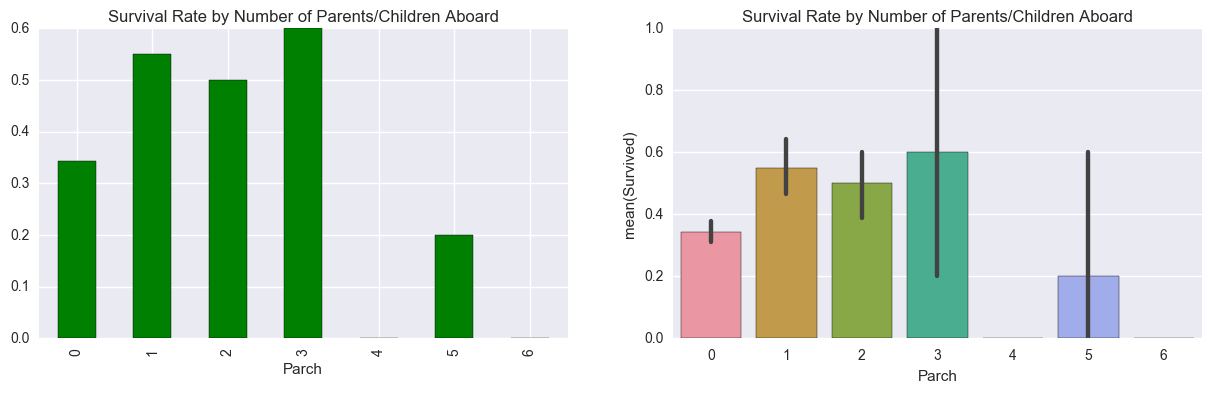

In [456]:
meanBarPlot(df, group='Parch', target='Survived', tag='Number of Parents/Children Aboard' )

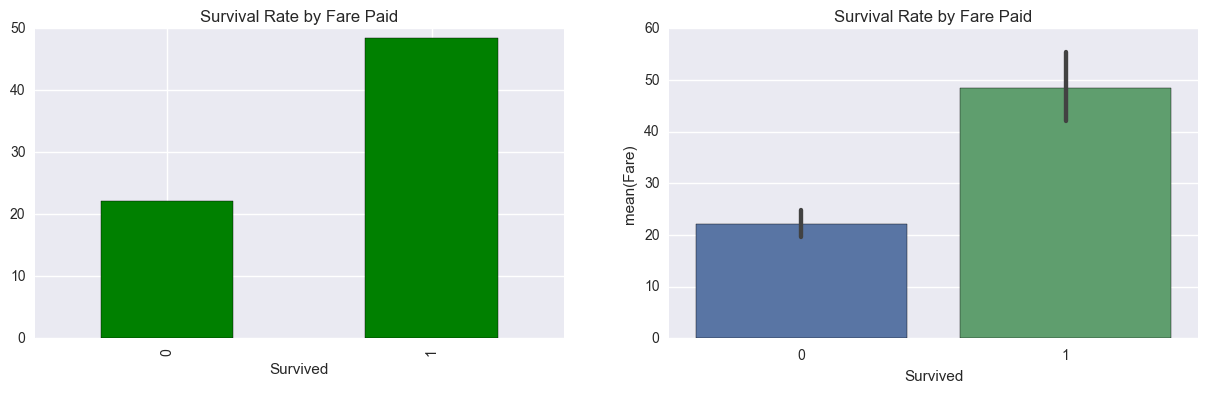

In [457]:
meanBarPlot(df, group='Survived', target='Fare', tag='Fare Paid')

In [458]:
## Reduce data dimensionality by consolidation of variables
df['family'] =  df['SibSp'] + df['Parch']
df['family'].loc[df['family'] > 0] = 1
df['family'].loc[df['family'] == 0] = 0

df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
## df.groupby('family')['Survived'].mean().plot(kind='bar')
## plt.show()

C:\workspace\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [459]:
def getPersonType(person):
    age,sex = person
    return 'child' if age < 17 else sex

df['person'] = df[['Age', 'Sex']].apply(getPersonType, axis=1)
df.drop(['Sex'], axis=1, inplace=True)
df.head()



,Survived,Pclass,Age,Fare,C,Q,family,person
0,0,3,22,7.2500,0.0,0.0,1,male
1,1,1,38,71.2833,1.0,0.0,1,female
2,1,3,26,7.9250,0.0,0.0,0,female
3,1,1,35,53.1000,0.0,0.0,1,female
4,0,3,35,8.0500,0.0,0.0,0,male


In [460]:
##df_fc = df.loc[df['Pclass'] == 1]
##df_fc.Fare.plot(kind='hist', bins=50)
##plt.show()
##plt.clf()

## Pclass seems to capture the impact of Fare so we can drop Fare without much information loss
df.drop('Fare', axis=1, inplace=True)



In [461]:
## Create Dummies for Person and Pclass

person_dummies = pd.get_dummies(df['person'])
## Drop males to be base case
person_dummies.drop(['male'], axis=1, inplace=True)
df = df.join(person_dummies)
df.drop(['person'], axis=1, inplace=True)


In [463]:
pclass_dummies = pd.get_dummies(df['Pclass'])
## Class 3 is the base case
pclass_dummies.drop([3], axis=1, inplace=True)
pclass_dummies.columns = ['class_1', 'class_2']
df = df.join(pclass_dummies)
df.drop(['Pclass'], axis=1, inplace=True)
print(df.head())

   Survived  Age    C    Q  family  child  female  class_1  class_2
0         0   22  0.0  0.0       1    0.0     0.0      0.0      0.0
1         1   38  1.0  0.0       1    0.0     1.0      1.0      0.0
2         1   26  0.0  0.0       0    0.0     1.0      0.0      0.0
3         1   35  0.0  0.0       1    0.0     1.0      1.0      0.0
4         0   35  0.0  0.0       0    0.0     0.0      0.0      0.0


# Classification

In [503]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing


features = df.drop(['Survived'], axis=1)
target = df['Survived']
features_scaled = preprocessing.scale(features) 
X_train, X_test, Y_train, Y_test = train_test_split(features_scaled, target, test_size=.3, random_state=0) 

In [495]:


clf = RandomForestClassifier(n_estimators=100, criterion='entropy')
clf.fit(X_train, Y_train)

print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))



0.9341894061
0.768656716418


Features:  Index(['Age', 'C', 'Q', 'family', 'child', 'female', 'class_1', 'class_2'], dtype='object')
Feature ranking:
1. feature 0 (0.514106)
2. feature 5 (0.232755)
3. feature 6 (0.082016)
4. feature 7 (0.050376)
5. feature 3 (0.037923)
6. feature 1 (0.034391)
7. feature 4 (0.025298)
8. feature 2 (0.023135)


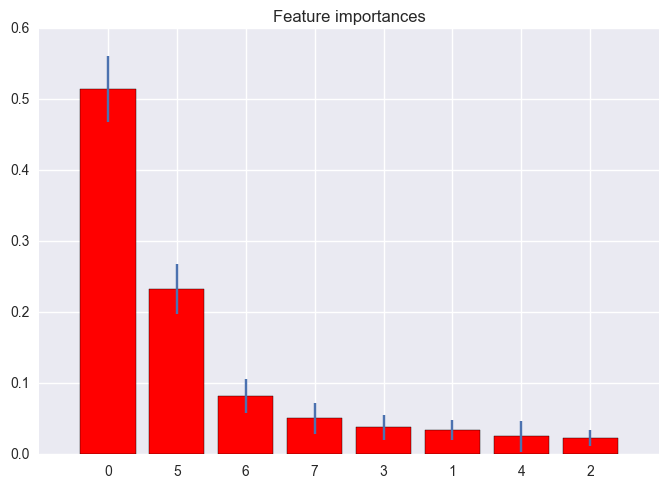

In [502]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Features: ", features.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [490]:
clf = SVC(kernel='rbf')
clf.fit(X_train, Y_train)

print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.829855537721
0.813432835821


In [504]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.75922953451
0.764925373134


# Takeaways
- The SVC achieved the best cross-validated accuracy (.813)
- The RandomForestClassifier's feature importance showed that age and sex were the two most influential variables with socioeconomic status being the third most important
